In [1]:
#Clasificacion de flores Iris

In [2]:
import pandas
import numpy 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
iris=datasets.load_iris()

In [8]:
X=iris.data[:,:2]
Y=iris.target

In [21]:
x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
y_min, y_max=X[:,1].min()-1,X[:,1].max()+1
h=(x_max-x_min)/100

xx, yy=numpy.meshgrid(numpy.arange(x_min,x_max,h),numpy.arange(y_min,y_max,h))
x_plot=numpy.c_[xx.ravel(),yy.ravel()]

In [22]:
C=1.0
svc=svm.SVC(kernel="linear",C=C,decision_function_shape="ovr").fit(X,Y)
ypred=svc.predict(x_plot)
ypred=ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel lineal')

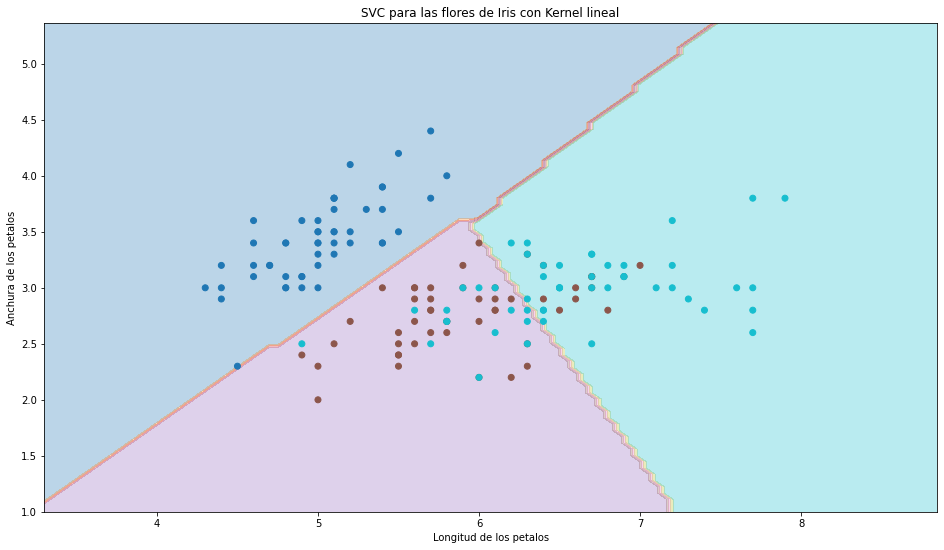

In [29]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de Iris con Kernel lineal")


In [37]:
C=1.0
svc=svm.SVC(kernel="rbf",C=C,decision_function_shape="ovr").fit(X,Y)
ypred=svc.predict(x_plot)
ypred=ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel radial')

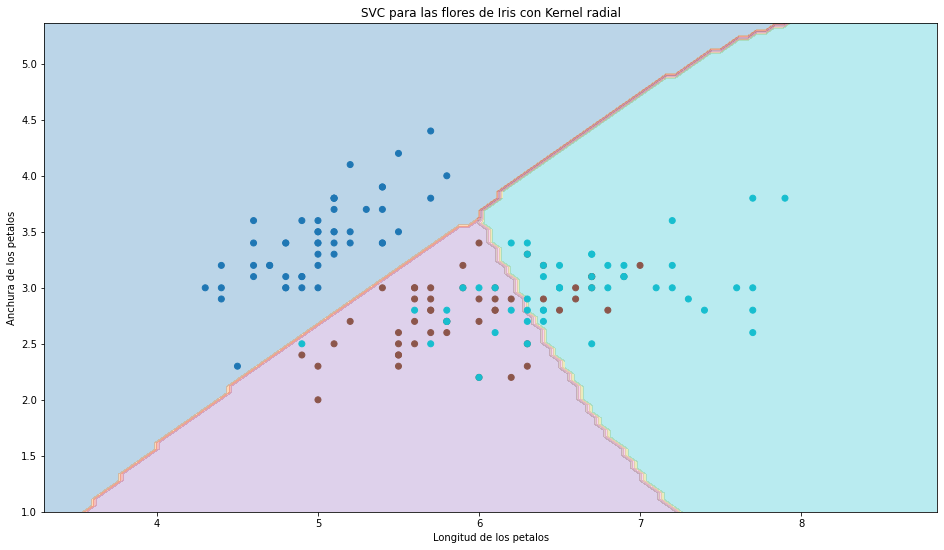

In [38]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de Iris con Kernel radial")

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [41]:
X,Y=shuffle(X,Y,random_state=0)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [44]:
parameters=[
    {
        "kernel": ["rbf"],
        "gamma": [1e-4,1e-3,1e-2,0.1,0.2,0.5],
        "C": [1,10,100,1000]
    },
    {
        "kernel":["linear"],
        "C":[1,10,100,1000]
    }
]

In [46]:
clf=GridSearchCV(svm.SVC(decision_function_shape="ovr"),param_grid=parameters,cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [47]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [51]:
means=clf.cv_results_["mean_test_score"]
stds=clf.cv_results_["std_test_score"]
params=clf.cv_results_["params"]
for m, s, p in zip(means,stds,params):
    print("%0.3f(+/-%0.3f) para %r"%(m,2*s,p))

0.753(+/-0.053) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753(+/-0.053) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.753(+/-0.053) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807(+/-0.154) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.807(+/-0.154) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.807(+/-0.154) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.753(+/-0.053) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753(+/-0.053) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813(+/-0.155) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.800(+/-0.152) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.800(+/-0.152) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.787(+/-0.150) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.753(+/-0.053) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813(+/-0.155) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.807(+/-0.154) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.800(+/-0.169) para {'C': 100, 'gamma': 0.1, 'kernel':

In [53]:
y_pred=clf.predict(xtest)

In [62]:
print(classification_report(ytest,y_pred,target_names=["setosa","versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.73      0.92      0.81        12
   virginica       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.86      0.84      0.84        38
weighted avg       0.88      0.87      0.86        38



In [63]:
#Resumen final de la clasificacion de Iris

In [67]:
def svm_iris(C=1,gamma=0.01,kernel="rbf"):
    import pandas
    import numpy 
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt
    
    iris=datasets.load_iris()

    X=iris.data[:,:2]
    Y=iris.target   

    x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min, y_max=X[:,1].min()-1,X[:,1].max()+1
    h=(x_max-x_min)/100

    xx, yy=numpy.meshgrid(numpy.arange(x_min,x_max,h),numpy.arange(y_min,y_max,h))
    x_plot=numpy.c_[xx.ravel(),yy.ravel()]

    svc=svm.SVC(kernel=kernel,C=C,gamma=gamma,decision_function_shape="ovr").fit(X,Y)
    ypred=svc.predict(x_plot)
    ypred=ypred.reshape(xx.shape)

    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10,alpha=0.3)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los petalos")
    plt.ylabel("Anchura de los petalos")
    plt.xlim(xx.min(),xx.max())
    plt.title("SVC para las flores de Iris con Kernel lineal")

In [68]:
from ipywidgets import interact, fixed

In [69]:
interact(svm_iris,C=[1,10,100,1000,1e6,1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.5,.99],
        kernel=["rbf","linear","sigmoid","poly","precomputed"])

interactive(children=(Dropdown(description='C', options=(1, 10, 100, 1000, 1000000.0, 10000000000.0), value=1)…

<function __main__.svm_iris(C=1, gamma=0.01, kernel='rbf')>